In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('gold_clean.csv',index_col=0)
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [62]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

## Seasonality analysis

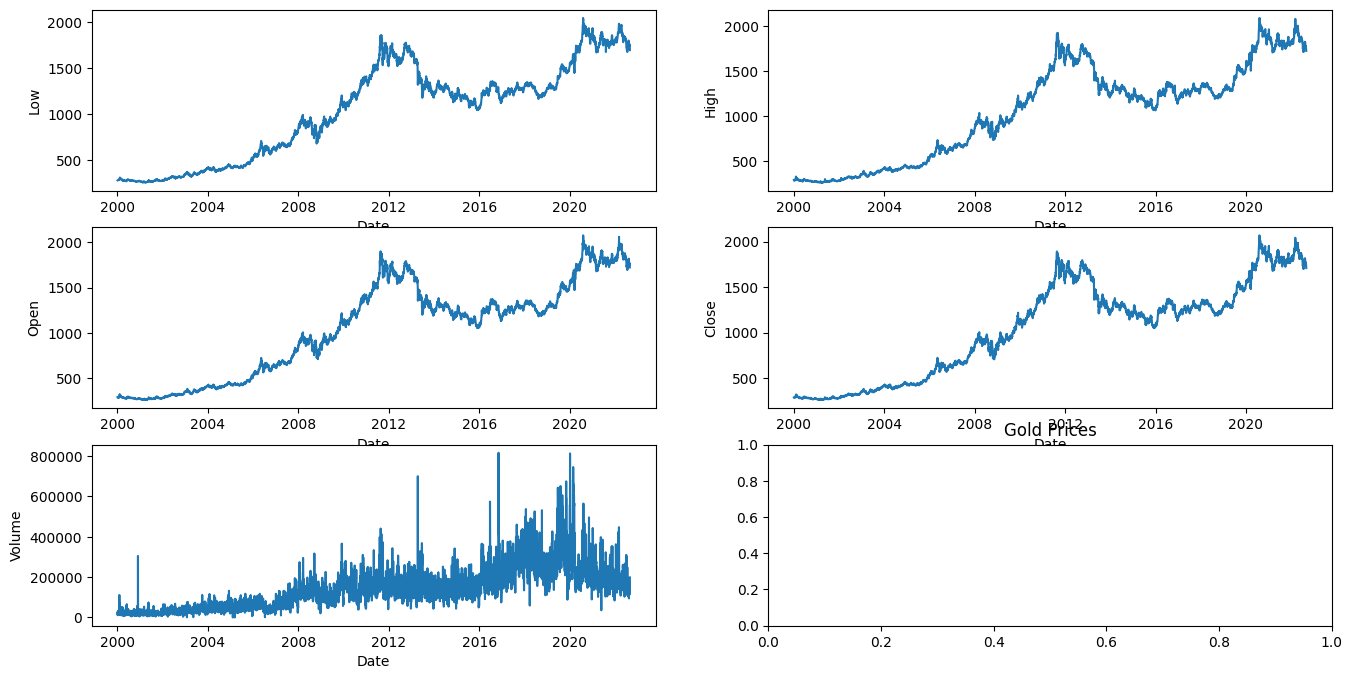

In [63]:
fig,ax = plt.subplots(ncols=2,nrows=3,figsize= (16,8))
col = ['Low','High','Open','Close','Volume']
ax = ax.flatten()
j = 0
for i in col:
    ax[j].plot(df.index,df[i])
    ax[j].set_xlabel("Date")
    ax[j].set_ylabel(i)
    j+=1
plt.title("Gold Prices")

plt.show()

In [64]:
import statsmodels.api as sm
from matplotlib import rcParams

<AxesSubplot: xlabel='Date'>

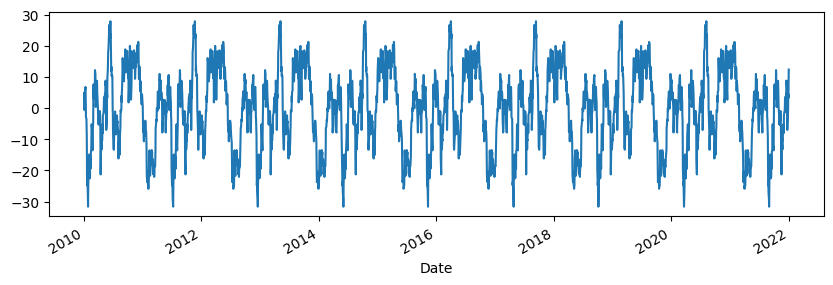

In [65]:
decomposition = sm.tsa.seasonal_decompose(df["Close"],period = 365,model='additive')

decomposition.seasonal['2010':'2021'].plot()

### Trend Analysis

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>]], dtype=object)

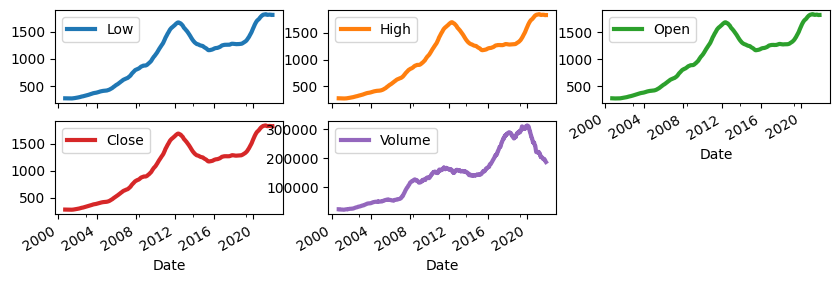

In [66]:
trend_dict = {}

for ts in col:
    decomposition = sm.tsa.seasonal_decompose(df[ts],period=365,model='additive')
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(2, 3), linewidth=3)

## Noise

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>]], dtype=object)

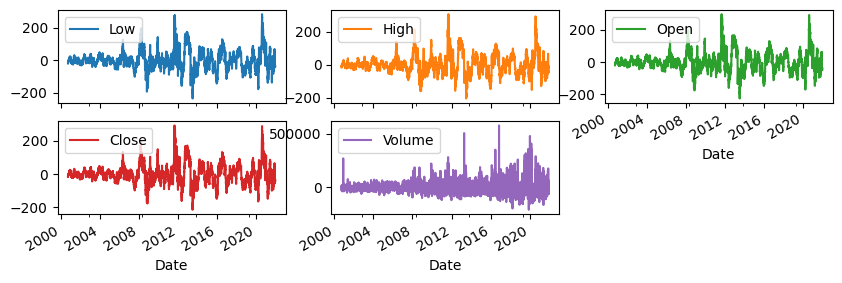

In [67]:
noise_dict = {}

for ts in col:
    decomposition = sm.tsa.seasonal_decompose(df[ts],period=365,model='additive')
    # Store back the results
    noise_dict[ts] = decomposition.resid

pd.DataFrame(noise_dict).plot(subplots=True, layout=(2, 3))

Autocorrelation

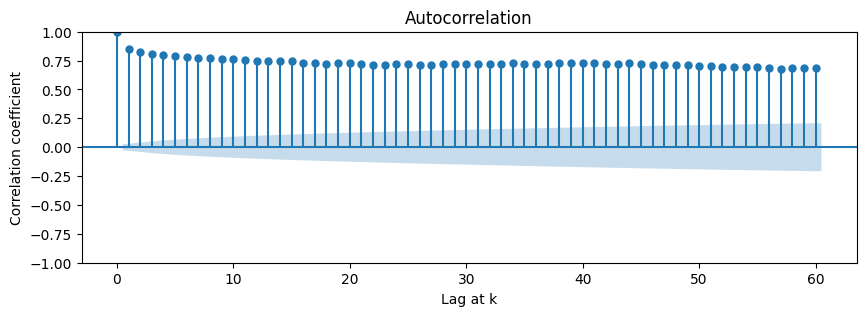

In [68]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 3

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(df['Volume'], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


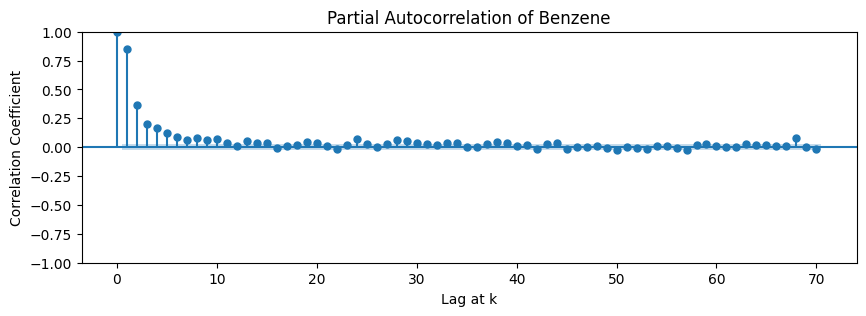

In [69]:
fig = tsaplots.plot_pacf(df['Volume'], lags=70)

plt.title("Partial Autocorrelation of Benzene")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show()